# Project Information

Project Title: Breast Cancer Prediction Using Machine Learning

Group Number : 07

Student Names and Registration Numbers: 

     Herath H.M.K.D.B : EG/2019/3601
     Vanderlan C.H.   : EG/2019/3763

# Data Loading

In [1]:
# Importing the requeired libaries

import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

# Supress future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the breast cancer Wisconsin dataset into a pandas DataFrame
df = pd.read_csv('data.csv')

# Displaying the first few rows of the DataFrame
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Printing the sape of the dataframe
print('Shape of the dataframe: ',df.shape)

Shape of the dataframe:  (569, 33)


In [4]:
# Displaying information about the DataFrame
# provides the data types of each column,the number of non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Getting count of number of M or B cells in diagnosis (Target Variable)
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Data Pre-Processing and EDA

## EDA

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<Axes: xlabel='diagnosis', ylabel='count'>

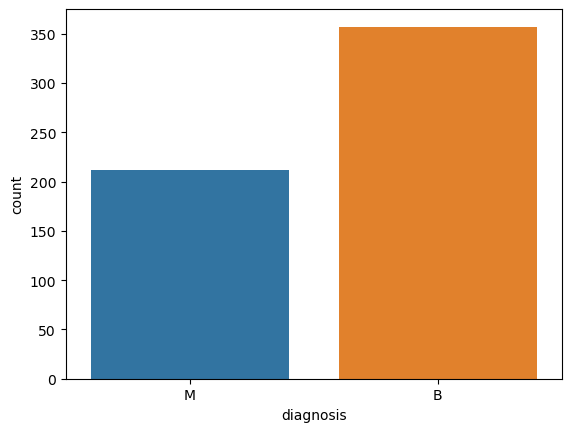

In [7]:
# Graphically representing the cell count for each type of diagnosis (Target Variable)
sns.countplot(x=df['diagnosis'], label='count')

## Handling null values

<Axes: >

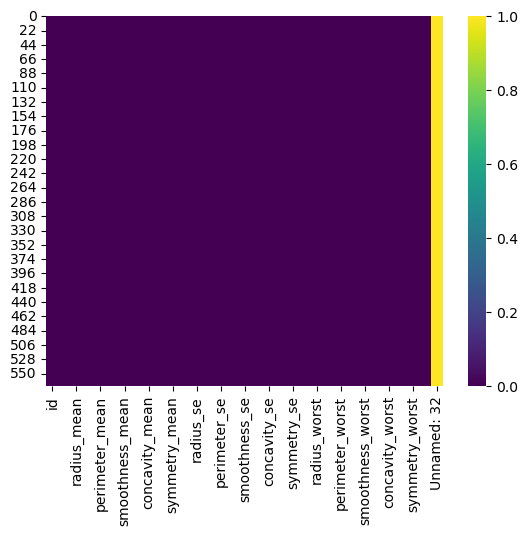

In [8]:
# Visualizing the presence of missing values using a heatmap
sns.heatmap(df.isnull(),cmap='viridis')

In [9]:
# Dropping columns with null values
df.dropna(axis=1, inplace=True)

In [10]:
# Printing the sape of the dataframe
print('Shape of the dataframe: ',df.shape)

Shape of the dataframe:  (569, 32)


In [11]:
# Displaying the first few rows of the DataFrame after dropping the columns with null values
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Handling Outliers

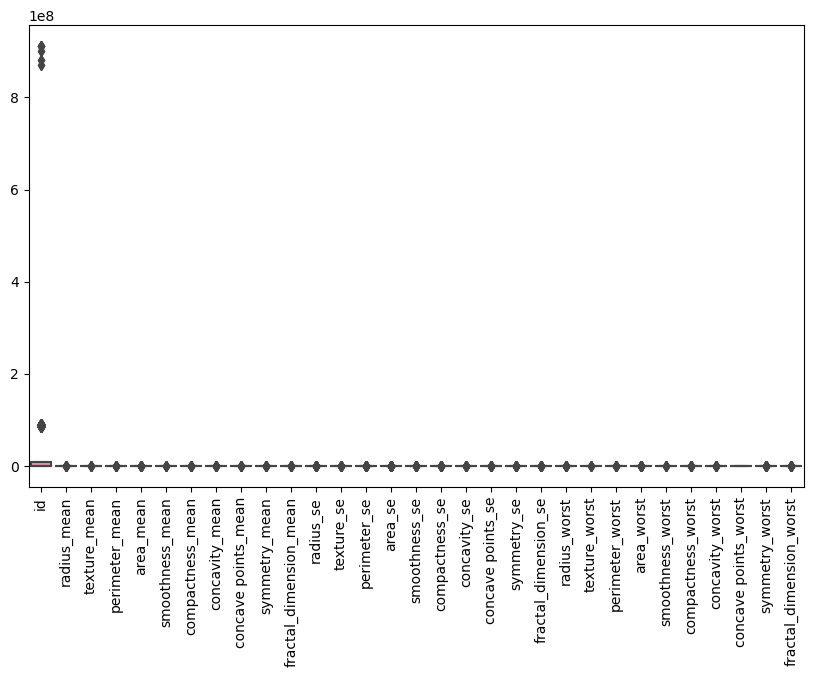

In [12]:
# Creating boxplots for each variable

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the boxplot with Seaborn
sns.boxplot(data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

All attributes don't have outliers. The attribute 'id' is not a dependent variable in this case. Therefore, outliers in the variable 'id' can be neglected.

## Handling Categorical values


In [13]:
# Encoding the values in diagnosis column of the DataFrame using LabelEncoder from scikit-learn

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df[df.columns[1]] = lb.fit_transform(df.iloc[:, 1].values)

In [14]:
# Displaying the first few rows of the DataFrame to inspect its structure and content
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Feature Selection

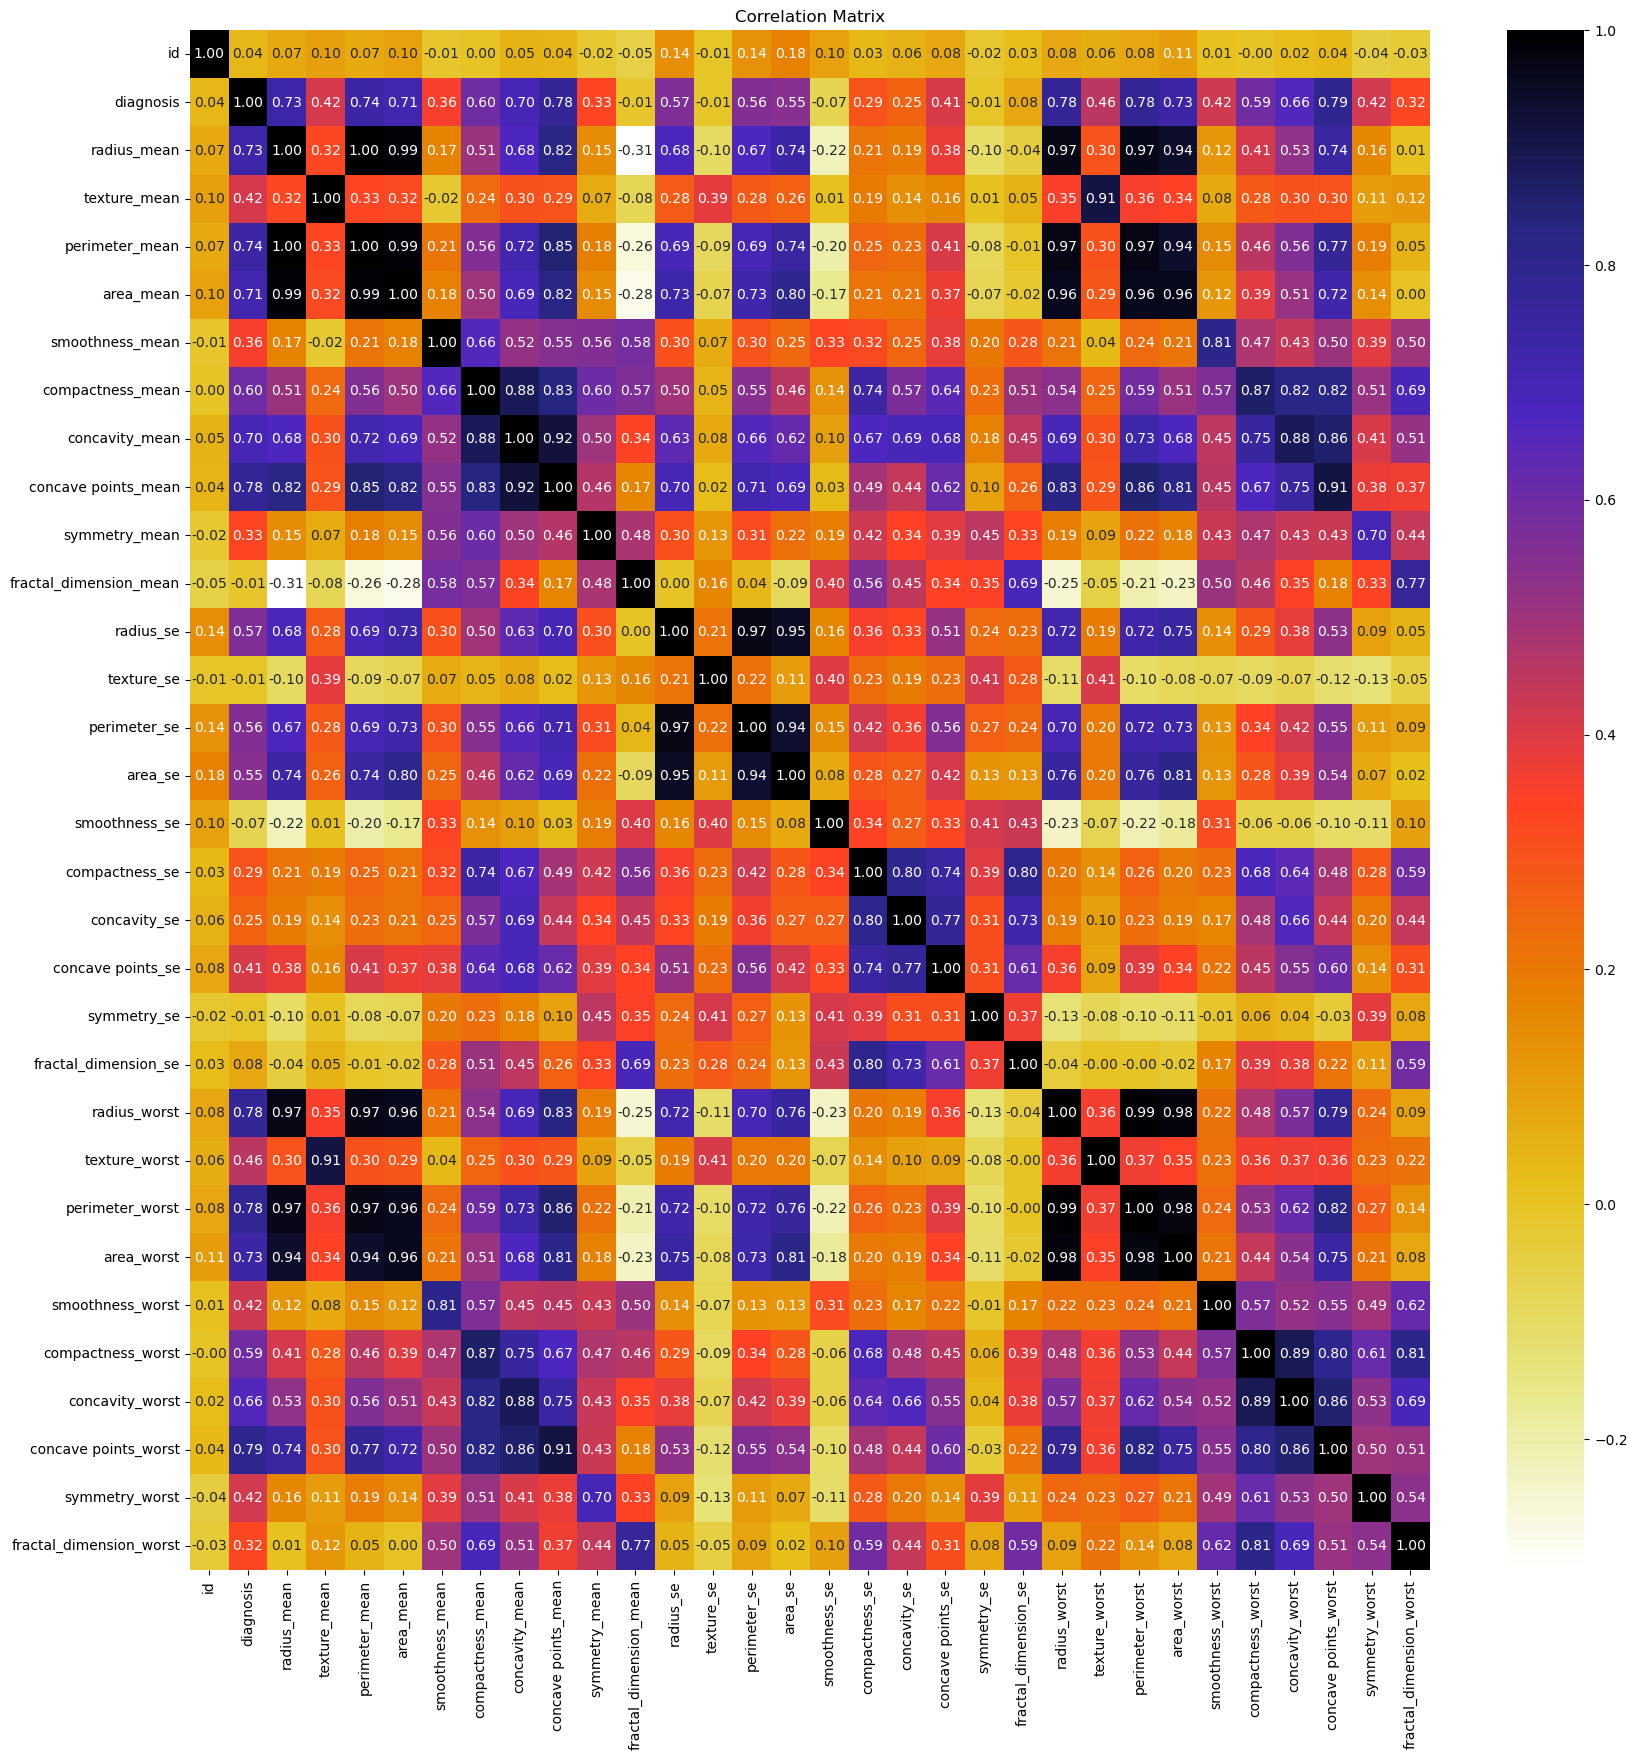

In [15]:
# Computing the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.CMRmap_r, fmt=".2f")

# Adding a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [16]:
# Finding pairs of highly correlated features in the correlation matrix above a specified threshold

# List to store pairs of highly correlated features
correlation_pairs=[]

# Setting the correlation threshold. We can change this to a desired value 
threashold=0.95

# Iterating over the upper triangle of the correlation matrix
for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if abs(corr_matrix.iloc[i,j])>threashold:
      correlation_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i,j]))

# Display the pairs of highly correlated features
correlation_pairs

[('perimeter_mean', 'radius_mean', 0.9978552814938109),
 ('area_mean', 'radius_mean', 0.9873571700566127),
 ('area_mean', 'perimeter_mean', 0.9865068039913907),
 ('perimeter_se', 'radius_se', 0.9727936770160764),
 ('area_se', 'radius_se', 0.951830112110991),
 ('radius_worst', 'radius_mean', 0.9695389726112055),
 ('radius_worst', 'perimeter_mean', 0.9694763634663146),
 ('radius_worst', 'area_mean', 0.9627460860470841),
 ('perimeter_worst', 'radius_mean', 0.9651365139559871),
 ('perimeter_worst', 'perimeter_mean', 0.9703868870426394),
 ('perimeter_worst', 'area_mean', 0.9591195743552645),
 ('perimeter_worst', 'radius_worst', 0.993707916102949),
 ('area_worst', 'area_mean', 0.9592133256498998),
 ('area_worst', 'radius_worst', 0.9840145644590742),
 ('area_worst', 'perimeter_worst', 0.9775780914063871)]

In [17]:
# Identifying unique features with high correlation from the list of correlation pairs

# List to store features with high correlation
features_to_drop = []

# Iterating through each pair of highly correlated features
for i,j,k in correlation_pairs:
  features_to_drop.append(i)

# Removing duplicates by converting the list to a set and then back to a list
features_to_drop = list(set(features_to_drop))

# Displaying the list of features with high correlation
features_to_drop

['perimeter_se',
 'perimeter_mean',
 'area_worst',
 'radius_worst',
 'area_mean',
 'perimeter_worst',
 'area_se']

In [18]:
# Dropping features identified as having high correlation from the DataFrame and displaying the dataframe

df = df.drop(features_to_drop, axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### dopping the attribute 'id'
The attribute 'id' has no impact to the model. Therefore, we can drop that attribute.

In [19]:
# Dropping the 'id' attribute
df = df.drop('id', axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Splitting Data


In [20]:
# Splitting the dataset into independent and dependent datasets
# dependent dataset = diagnosis
# Independent dataset = rest of the columns

X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']
X

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.01867,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,...,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,...,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,...,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,...,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [22]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=20)
X_train

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
9,12.460,24.04,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,...,0.014320,0.01789,0.010080,40.68,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
222,10.180,17.53,0.10610,0.08502,0.017680,0.019150,0.1910,0.06908,0.2467,1.2170,...,0.007624,0.02637,0.003761,22.84,0.14060,0.14400,0.06572,0.05575,0.3055,0.08797
114,8.726,15.83,0.11500,0.08201,0.041320,0.019240,0.1649,0.07633,0.1665,0.5864,...,0.010400,0.01708,0.003806,19.62,0.17240,0.23640,0.24560,0.10500,0.2926,0.10170
2,19.690,21.25,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,...,0.020580,0.02250,0.004571,25.53,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
307,9.000,14.40,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,0.1746,1.3050,...,0.003472,0.02701,0.002153,20.07,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,19.800,21.56,0.09383,0.13060,0.127200,0.086910,0.2094,0.05581,0.9553,1.1860,...,0.017120,0.01897,0.004045,28.64,0.13530,0.32350,0.36170,0.18200,0.3070,0.08255
223,15.750,20.25,0.10250,0.12040,0.114700,0.064620,0.1935,0.06303,0.3473,0.9209,...,0.008637,0.01772,0.003131,30.29,0.15520,0.44800,0.39760,0.14790,0.3993,0.10640
271,11.290,13.04,0.09834,0.07608,0.032650,0.027550,0.1769,0.06270,0.1904,0.5293,...,0.008849,0.01692,0.002817,16.18,0.13580,0.15070,0.12750,0.08750,0.2733,0.08022
474,10.880,15.62,0.10070,0.10690,0.051150,0.015710,0.1861,0.06837,0.1482,0.5380,...,0.006691,0.01212,0.004672,19.35,0.13320,0.38980,0.33650,0.07966,0.2581,0.10800


## Feature Scaling

In [23]:
#Scaling the data(feature scaling)
# different columns represent different ranges of values
# radius_mean=10-20, peimeter_mean=77-140, area_mean=385-1300
# These types of values should be scaled to the same range

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
#print data
X_train

array([[-0.47650454,  1.06916993,  1.70745911, ...,  1.63977233,
         2.51102177,  6.93389202],
       [-1.13284528, -0.42993074,  0.78304908, ..., -0.88853091,
         0.30596389,  0.2511347 ],
       [-1.55140644, -0.82140096,  1.44122902, ..., -0.1350124 ,
         0.08899023,  1.01876004],
       ...,
       [-0.81331097, -1.46387267,  0.20917533, ..., -0.40276009,
        -0.23562927, -0.18215711],
       [-0.93133716, -0.86975904,  0.38370394, ..., -0.52271106,
        -0.49128815,  1.37098435],
       [-0.44771767, -0.07530477, -0.58507777, ..., -0.32396577,
        -1.26499267, -0.648435  ]])

# Machine Learning Model Implementation & Evaluation

## SVM Model

In [25]:
# Importing the SVC class from the sklearn.svm module
from sklearn.svm import SVC

# Creating an instance of the LinearSVC class
SVM_classifier = SVC()

# Training the SVM classifier using the fit method with training data
SVM_classifier.fit(X_train, Y_train)

SVC()

In [26]:
# make use of trained model to make predictions on test data
predictions = SVM_classifier.predict(X_test)

In [27]:
# get accuracy score for model
from sklearn.metrics import accuracy_score
print('Accuracy :', accuracy_score(Y_test, predictions))

Accuracy : 0.965034965034965


### Hyperparameter Tuning

The default kernel is set to 'rbf' in sklearn. We can change the kernel type and identify the kernel type which gives the best performance.

In [28]:
# Define the list of kernel types
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

# Iterating over each kernel type
for kernel in kernel_types:
    # Creating an instance of the SVC class with the specified kernel
    SVM_classifier = SVC(kernel=kernel)
    
    # Training the SVM classifier using the fit method with training data
    SVM_classifier.fit(X_train, Y_train)

    # Make predictions on the test data
    predictions = SVM_classifier.predict(X_test)

    # Getting accuracy score for the model
    accuracy = accuracy_score(Y_test, predictions)
    print(f'Accuracy for {kernel} kernel:', accuracy)

Accuracy for linear kernel: 0.9790209790209791
Accuracy for poly kernel: 0.8671328671328671
Accuracy for rbf kernel: 0.965034965034965
Accuracy for sigmoid kernel: 0.9300699300699301


Therefore maximum accuracy is obtained from Linear Kernel. Therefore, it will be used for the model training.

In [29]:
# Printing training and testing accuracy scores for model
SVM_classifier = SVC(kernel='linear')
SVM_classifier.fit(X_train, Y_train)
predictions = SVM_classifier.predict(X_test)
print('Train Accuracy: ',SVM_classifier.score(X_train, Y_train))
print('Test Accuracy : ',SVM_classifier.score(X_test, Y_test))

Train Accuracy:  0.9835680751173709
Test Accuracy :  0.9790209790209791


In [30]:
# calculating the confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
cm = confusion_matrix(Y_test, predictions)
print(cm)

[[85  1]
 [ 2 55]]


<Axes: >

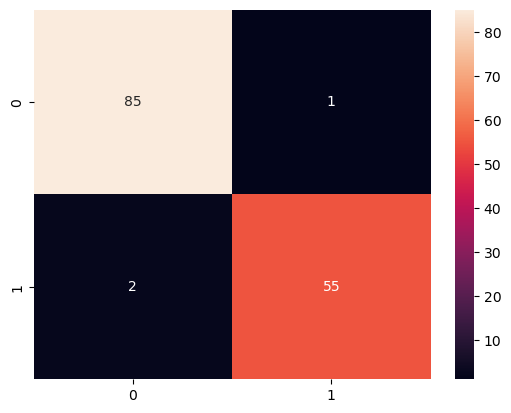

In [31]:
# Creating the heatmap for confusion matrix
sns.heatmap(cm, annot=True)

In [32]:
# Calculating performance metrics for the model

SVM_precision = precision_score(Y_test, predictions)
SVM_recall = recall_score(Y_test, predictions)
SVM_f1score = f1_score(Y_test, predictions)
print('Precision : ', SVM_precision)
print('Recall    : ', SVM_recall)
print('F1 score  : ', SVM_f1score)

Precision :  0.9821428571428571
Recall    :  0.9649122807017544
F1 score  :  0.9734513274336283


### Cross Validation

In [33]:
# Perform k-fold cross-validation to evaluate the SVM classifier's performance on the training data

from sklearn.model_selection import cross_val_score
k_fold_accuracy = cross_val_score(SVM_classifier, X_train, Y_train, cv=3)
k_fold_mean_SVM = k_fold_accuracy.mean()
print("Accuracy after the cross validation: ",k_fold_mean_SVM)

Accuracy after the cross validation:  0.9553990610328639


## KNN Model


In [34]:
# Importing the KNeighborsClassifier class from the sklearn.neighbors module
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [35]:
k=2
# Training the model
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [36]:
# Predicting the labels for the test data using the trained KNN model
Pred_y = KNN_model.predict(X_test)

# Calculating and printing the accuracy score of the predictions
print('Accuracy is ', metrics.accuracy_score(Y_test, Pred_y))

Accuracy is  0.916083916083916


### Hyperparameter Tuning

When we change the value of k the accuracy will be changed. Therefore, we need to find an optimal k value for best accuracy.

Maximum Accuracy 0.958041958041958 at k = 5


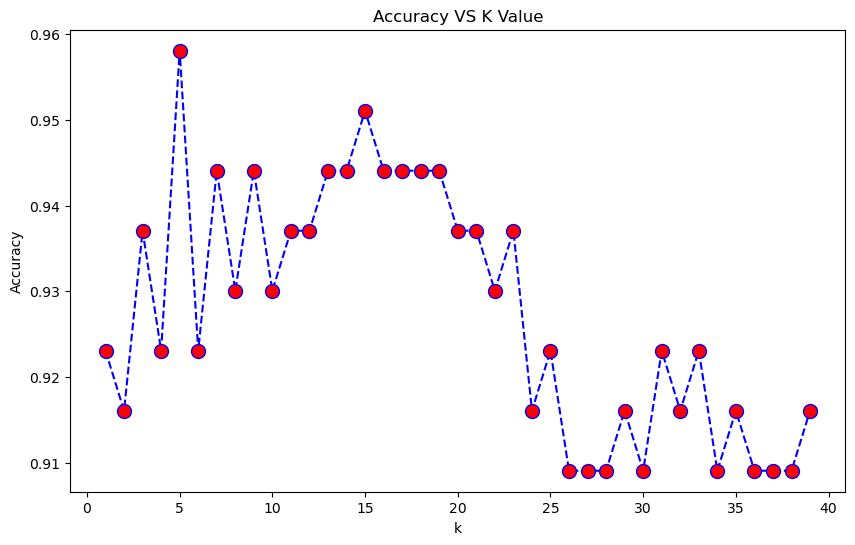

In [37]:
# Evaluate the performance of the k-nearest neighbors classifier with varying values of k

# List to store accuracy scores for different values of k
acc = []
from sklearn import metrics

# Loop through different values of k to train and evaluate k-nearest neighbors classifiers
for i in range(1,40):
  neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, Y_train)
  yhat = neigh.predict(X_test)
  acc.append(metrics.accuracy_score(Y_test, yhat))

# Plotting the accuracy of k-nearest neighbors classifier against different values of k
plt.figure(figsize=(10,6))
plt.plot(range(1,40), acc, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy VS K Value')
plt.xlabel('k')
plt.ylabel('Accuracy')

# Printing the Maximum Accuracy and the corresponding k value
print('Maximum Accuracy', max(acc), 'at k =', acc.index(max(acc)) + 1)

Same result can be obtained by evaluating the min error for different k values

Min error 0.04195804195804196 at k = 5


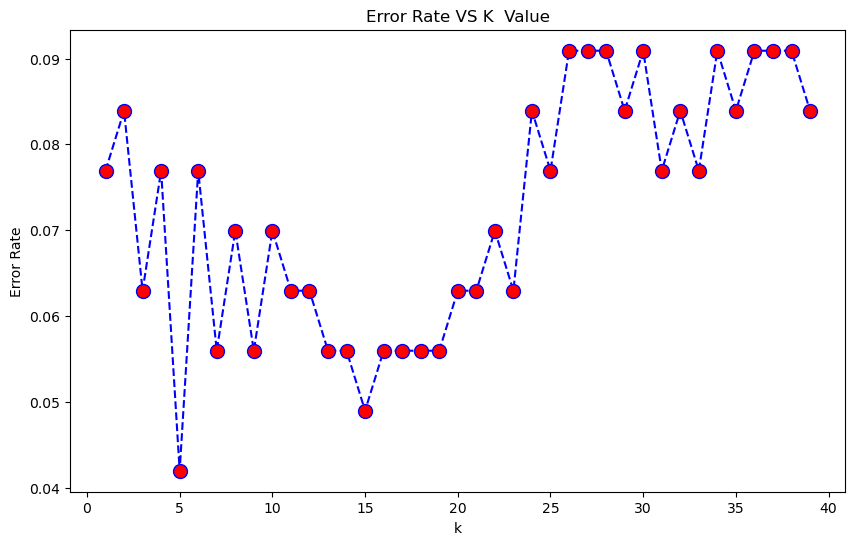

In [38]:
# Loop through different values of k to train k-nearest neighbors classifiers and calculate error rates

# List to store error rates for different values of k
error_rate = []

# Iterate through different values of k to train k-nearest neighbors classifiers and compute error rates
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != Y_test))

# Plotting the error rates against different values of k to visualize the relationship between k and classification errors    
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate VS K  Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

# Printing the minimum error and the corresponding k value
print('Min error', min(error_rate), 'at k =', error_rate.index(min(error_rate))+1)

Therefore at k=5 the accuracy is maximum.

In [39]:
k=5

# Training the model
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, Y_train)
Pred_y = KNN_model.predict(X_test)

print('Train Accuracy: ',KNN_model.score(X_train, Y_train))
print('Test Accuracy : ',KNN_model.score(X_test, Y_test))

Train Accuracy:  0.9694835680751174
Test Accuracy :  0.958041958041958


<Axes: >

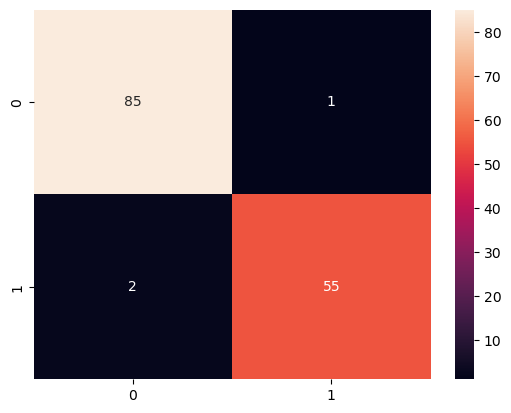

In [40]:
# calculating and plotting the confusion matrix
cm2 = confusion_matrix(Y_test, Pred_y)

# Creating the heatmap
sns.heatmap(cm, annot=True)

In [41]:
# Calculating performance metrics for the model

KNN_precision = precision_score(Y_test, Pred_y)
KNN_recall = recall_score(Y_test, Pred_y)
KNN_f1score = f1_score(Y_test, Pred_y)
print('Precision : ', KNN_precision)
print('Recall    : ', KNN_recall)
print('F1 score  : ', KNN_f1score)

Precision :  0.9636363636363636
Recall    :  0.9298245614035088
F1 score  :  0.9464285714285715


### Cross Validation

In [42]:
# Perform k-fold cross-validation to evaluate the KNN classifier's performance on the training data

from sklearn.model_selection import cross_val_score
k_fold_accuracy = cross_val_score(KNN_model, X_train, Y_train, cv=3)
k_fold_mean_KNN = k_fold_accuracy.mean()
print("Accuracy after the cross validation: ",k_fold_mean_KNN)

Accuracy after the cross validation:  0.9413145539906104


## Results and Model Comparison

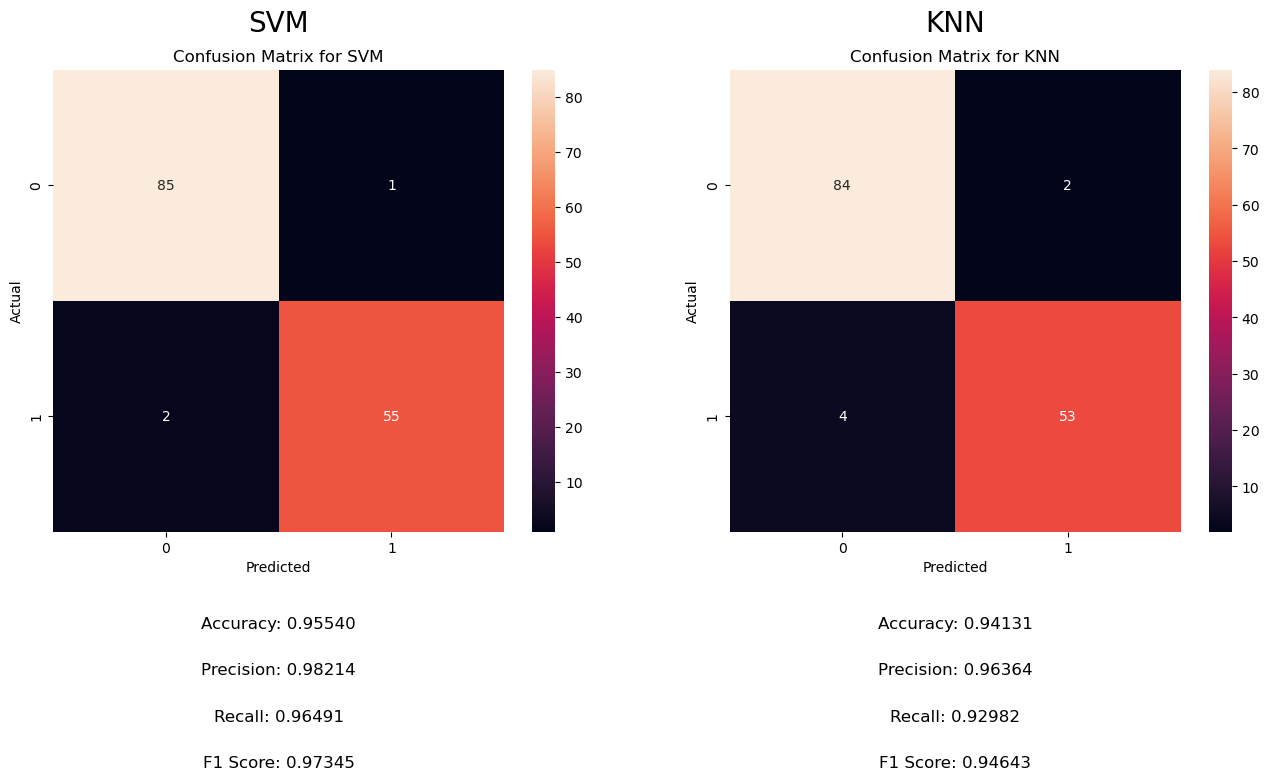

In [43]:
# Plotting confusion Matrix and performance metrics to compare the 2 models

plt.figure(figsize=(16, 6))

# Plotting the Confusion Matrix of SVM
plt.subplot(1, 2, 1)
plt.text(0.5, 1.1, 'SVM', fontsize=20, ha='center', va='center', transform=plt.gca().transAxes)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for SVM')

# Adding accuracy, precision, recall, and F1-score values as annotations below the confusion matrix
plt.text(0.5, -0.2, f'Accuracy: {k_fold_mean_SVM:.5f}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.3, f'Precision: {SVM_precision:.5f}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.4, f'Recall: {SVM_recall:.5f}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.5, f'F1 Score: {SVM_f1score:.5f}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)

# Plotting the Confusion Matrix of KNN model
plt.subplot(1, 2, 2)
plt.text(0.5, 1.1, 'KNN', fontsize=20, ha='center', va='center', transform=plt.gca().transAxes)
sns.heatmap(cm2, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for KNN')

# Adding accuracy, precision, recall, and F1-score values as annotations below the confusion matrix
plt.text(0.5, -0.2, f'Accuracy: {k_fold_mean_KNN:.5f}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.3, f'Precision: {KNN_precision:.5f}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.4, f'Recall: {KNN_recall:.5f}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.5, f'F1 Score: {KNN_f1score:.5f}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

Therefore, when comparing performance metrics of the two models, SVM performs well.